In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('E:/Skills training/Datasets/heart.csv')

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [10]:
#Checking for Nulls
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [4]:
#Seperate the Dependent and Independent variables

X = df.iloc[:,0:len(df.columns)-1]
y = df.iloc[:,-1]

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [39]:
#Categorical variables to encode
#Categorical variables are 'sex','cp','fbs','restecg','exang','slope','ca','thal'

In [99]:
#ONE HOT ENCODER Method (Later)
#All the Categorical Variables are already Numeric (i.e 0,1,2) and not say Country name; 
#But still would encode to get dummies in order to remove heirarchy
'''
categ_var = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
X1 = X.copy()
from sklearn.preprocessing import OneHotEncoder
onehot_obj = OneHotEncoder()
enc_var = onehot_obj.fit_transform(X1[:][categ_var])
enc_var
enc_var.toarray()
ohe_1 = OneHotEncoder(categorical_features=['categ_var'])
....
....... ??
'''

In [5]:
#Encoding using Pandas get dummies
X = pd.get_dummies(X,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

#note no drop_first=True for Classification problems 

In [6]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [7]:
#Split into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [9]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler       #import class
scalerObj_X = StandardScaler()                                   #Create object of the class
scalerObj_X.fit(X_train)                      # FIT to training set using the fit method
X_train = scalerObj_X.transform(X_train)             # TRANSFORM the training set
X_test = scalerObj_X.transform(X_test)              #TRANSFORM the Test Set


In [10]:
X_train

array([[-0.49780259,  1.04423932, -0.08371655, ..., -0.2284161 ,
        -1.14226175,  1.2768848 ],
       [ 1.64736734,  0.46263767, -0.16590481, ..., -0.2284161 ,
         0.87545609, -0.78315601],
       [-0.94941732, -1.57296809, -0.88505209, ..., -0.2284161 ,
         0.87545609, -0.78315601],
       ...,
       [ 0.40542685, -1.57296809, -0.14535775, ..., -0.2284161 ,
        -1.14226175,  1.2768848 ],
       [-1.40103204,  0.22999701,  1.39567213, ...,  4.37797518,
        -1.14226175, -0.78315601],
       [-0.27199523,  2.32376294, -0.98778742, ..., -0.2284161 ,
        -1.14226175,  1.2768848 ]])


### <font color = 'teal'> K-NN Algorithm 
    
   - _Change in number of neighbours model parameter to observe change in accuracy._
   - _As neighbours increase the model becomes more losely fit, more generalized, avoids overfitting._
   - _Below we have used n=2, n=5 and n=8 to observe change in model accuracy._
   


##### Knn Iteration 1 with no of  neighbors = 2

In [14]:
# Train K-NN Algorithm


from sklearn.neighbors import KNeighborsClassifier
knn_obj = KNeighborsClassifier(n_neighbors=2)
knn_obj.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [14]:
knn_obj.classes_        #Classes in the model

array([0, 1], dtype=int64)

In [52]:
# EVALUATE THE TRAINED MODEL

# Score
# Confusion Matrix
#f1 Score
# Precision, Recall |  PR Curve
# Tpr, Fpr | ROC & AUC


from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve

In [15]:
# Score of trained model
knn_obj.score(X_train,y_train)

0.8884297520661157

In [19]:
y_train_predknn_n2 = knn_obj.predict(X_train)

In [22]:
# Training Set Confusion matrix for knn_n=2
confusion_matrix(y_train, y_train_predknn_n2)          

array([[105,   0],
       [ 27, 110]], dtype=int64)

In [34]:
# EVALUATE MODEL PREDICTIONS ON UNSEEN DATA

y_test_predknn_n2 = knn_obj.predict(X_test)

In [36]:
knn_obj.score(X_test,y_test)

0.8032786885245902

In [37]:
confusion_matrix(y_test,y_test_predknn_n2)

array([[29,  4],
       [ 8, 20]], dtype=int64)

##### <font color = 'Red'> ========================     PR Curve and ROC Curve pending      ===============================

In [30]:
#Precision score for knn with n=2
precision_score(y_train, y_train_predknn_n2, average =None)               

array([0.79545455, 1.        ])

In [31]:
#Recall for knn with n=2
recall_score(y_train, y_train_predknn_n2, average = None) 

array([1.        , 0.80291971])

In [28]:
#F1 score for knn with n=2
f1_score(y_train,y_train_predknn_n2)

0.8906882591093117

In [ ]:
# Scores for each instance and thresholds
### y_scores = knn_obj.decision_function(X_train)

In [45]:
##from sklearn.metrics import precision_recall_curve      #plots Precision vs Recall for different thresholds
## from sklearn.metrics import roc_curve               #Plots TPR vs 1-TNR


##### <font color = 'Red'> =============================================

##### Knn Iteration 2 with no of  neighbors = 5

In [38]:
# Remember as n increases, becomes more losely fit, so may not make the best predictions on the training set, but
#performance with test set would improve. So we avoid overfitting.

knn_obj_1 = KNeighborsClassifier(n_neighbors=5)
knn_obj_1.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
# Evaluate the trained model 

knn_obj_1.score(X_train,y_train)

0.871900826446281

In [43]:
y_train_predknn_n5 = knn_obj_1.predict(X_train)

In [45]:
confusion_matrix(y_train,y_train_predknn_n5)

array([[ 86,  19],
       [ 12, 125]], dtype=int64)

In [46]:
#Evaluate Model predictions on unseen data

knn_obj_1.score(X_test,y_test)

0.9344262295081968

In [47]:
y_test_predknn_n5 = knn_obj_1.predict(X_test)

In [48]:
confusion_matrix(y_test,y_test_predknn_n5)

array([[29,  4],
       [ 0, 28]], dtype=int64)

##### Knn iter 3: No of Neighbors = 8

In [49]:
knn_obj2 = KNeighborsClassifier(n_neighbors=8)
knn_obj2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [50]:
#Evaluate the trained model


# Score of training set for neighbors = 8
knn_obj2.score(X_train,y_train)

0.8429752066115702

In [52]:
y_train_predN8 = knn_obj2.predict(X_train)

In [53]:
confusion_matrix(y_train,y_train_predN8)

array([[ 87,  18],
       [ 20, 117]], dtype=int64)

In [54]:
# Evaluate Model predictions on unseen data for Neighbours = 8


knn_obj2.score(X_test,y_test)

0.9344262295081968

In [55]:
y_test_predknn_n8 = knn_obj2.predict(X_test)

In [56]:
confusion_matrix(y_test,y_test_predknn_n8)

array([[30,  3],
       [ 1, 27]], dtype=int64)

##### KNN FINAL OBSERVATIONS 
 - _when changing neighbors from 2 to 5 we see that accuracy of training set only slightly changes however as expected accuracy_ 
 _of the test set improves (from 74% to 84%), so huge improvement._ <br>
 - _also we see precision score slightly reduces but recall score improves when number of neighbors increases._
 - _going from 5 to 8 neighbors brings no improvement in accuracy of test set predictions, but slightly reduces accuracy of test. So n=5 is best knn model based on score._


### <font color = 'teal'> DECISION TREE Algorithm 
    
 - _In Decision Tree accuracy (overfitting/underfitting) would vary with 'Max no of leaf nodes' & 'Max depth'_
 - _We start with no limitations on tree depth and then check performance by limiting tree depth_ <br>
    _NOTE - Scaling may be avoided for decision trees_

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_clfobj1 = DecisionTreeClassifier(random_state=0)     #using default impurity measure (gigi)

In [15]:
tree_clfobj1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_train_predTree1 = tree_clfobj1.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score

In [20]:
#Training Score
accuracy_score(y_train,y_train_predTree1)

1.0

In [21]:
#tree_clfobj1.score(X_train,y_train)

1.0

In [23]:
#training confusion matrix
confusion_matrix(y_train,y_train_predTree1)

array([[111,   0],
       [  0, 131]], dtype=int64)

##### The decision tree has fit perfectly to the training set. <br> lets check performance on Test. Could be a case of overfitting

In [24]:
y_test_predTree1 = tree_clfobj1.predict(X_test)

In [25]:
accuracy_score(y_test,y_test_predTree1)

0.7704918032786885

In [31]:
tree_clfobj1.score(X_test,y_test)

0.7704918032786885

In [26]:
# Seen above. Accuracy score is quite low. For Knn we achieved a top score of 84%

In [27]:
confusion_matrix(y_test,y_test_predTree1)

array([[21,  6],
       [ 8, 26]], dtype=int64)

##### Reducing Tree depth to reduce overfitting and imporve performance on Test

In [43]:
tree_clfobj1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
#Check unpruned tree depth
tree_clfobj1.tree_.max_depth

10

In [45]:
tree_clfobj2 = DecisionTreeClassifier(max_depth=8, random_state=0)
tree_clfobj2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
tree_clfobj2.score(X_train,y_train)


0.9917355371900827

In [47]:
y_test_predT2 = tree_clfobj2.predict(X_test)

In [50]:
tree_clfobj2.score(X_test,y_test)

0.7868852459016393

In [51]:
#Confusion matrix with new tree model
confusion_matrix(y_test,y_test_predT2)

array([[21,  6],
       [ 7, 27]], dtype=int64)

##### Only slight improvement by reducing tree depth to 8; basically 1 extra correct prediction <br>reducing depth further 

In [52]:
del tree_clfobj2

In [53]:
tree_clfobj2 = DecisionTreeClassifier(max_depth=4,random_state=0)
tree_clfobj2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
#training set score
tree_clfobj2.score(X_train,y_train)         #We see below training accuracy has reduced

0.871900826446281

In [57]:
#Make predictions on test set
y_test_predT2 = tree_clfobj2.predict(X_test)

In [59]:
#test set score
tree_clfobj2.score(X_test,y_test)

0.8360655737704918

In [ ]:
## Score exactly same as the best score achieved through Knn

In [58]:
confusion_matrix(y_test,y_test_predT2)

array([[22,  5],
       [ 5, 29]], dtype=int64)

In [62]:
# If needed can compare with confusion matrix of KNN test set to check 
# if any difference between False Positives and False Neg between the 2 models.
# in case 1 is more desirable than the other 

In [63]:
# Can maybe make a few more changes in Classifier parameters to acheive better results???

##### DECISION TREE FINAL OBSERVATIONS
- When going with default tree depth (10) we see that overfitting happens. Training set accuracy is 0 but test set accuracy is ver low.
- Using Regularization i.e. Setting a Max depth we stop tree from perfectly fitting to training data.
- When setting Max depth to 8 we see Test Accuracy has improved to 84% (same as best obtained with knn).
- Can compare confusion Matrix of test set of KNN and Decision tree to see which would be preferable (<font color='red'>PENDING)
- Can we improve Decision tree some more (<font color='red'>PENDING)


###  <font color='teal'> LOGISTIC REGRESSION
    
 - _Logistic regression is a linear classifier so will need to see how well it fits the data._

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg_obj = LogisticRegression()

In [13]:
logreg_obj.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
#Evaluate the Trained Model 

#Score of training set
logreg_obj.score(X_train,y_train)

0.8842975206611571

In [25]:
y_train_predLog = logreg_obj.predict(X_train)

In [26]:
confusion_matrix(y_train,y_train_predLog)

array([[ 87,  18],
       [ 10, 127]], dtype=int64)

In [64]:
#We see score of training set is very close to the best model we obtained for knn.
#Comparing confusion matrix of training set of knn and logistic we see its almost identical

In [66]:
# Evaluate Model predictions on unseen data

logreg_obj.score(X_test,y_test)

0.8524590163934426

In [67]:
y_test_predLog = logreg_obj.predict(X_test)

In [24]:
# ======================== In Conclusion ===========
#Compare all models and model predictions for the 3 algorithms i.e. knn, dec tree and logistic reg to decide on best model
#for this dataset


##### Logistic Regression MODEL EVALUATION
##### Confusion Matrix
##### Tpr, Fpr || ROC AUC  
##### Precision, Recall || PR Curve

In [19]:
lr_probs = logreg_obj.predict_proba(X_train)

# Returns the probability of the sample for each class in the model 
# classes are ordered as they are in ``self.classes_``
# essentially yscores that are used in roc curve method

In [28]:
logreg_obj.classes_

array([0, 1], dtype=int64)

In [22]:
lr_probs

array([[0.93668847, 0.06331153],
       [0.10833855, 0.89166145],
       [0.00644615, 0.99355385],
       [0.2006096 , 0.7993904 ],
       [0.31041541, 0.68958459],
       [0.97525742, 0.02474258],
       [0.92510635, 0.07489365],
       [0.91262078, 0.08737922],
       [0.03715046, 0.96284954],
       [0.99558903, 0.00441097],
       [0.16001344, 0.83998656],
       [0.00495636, 0.99504364],
       [0.04881041, 0.95118959],
       [0.01162   , 0.98838   ],
       [0.99174377, 0.00825623],
       [0.22385999, 0.77614001],
       [0.01521488, 0.98478512],
       [0.16533766, 0.83466234],
       [0.78621158, 0.21378842],
       [0.26540087, 0.73459913],
       [0.24057553, 0.75942447],
       [0.99370607, 0.00629393],
       [0.00836672, 0.99163328],
       [0.79139155, 0.20860845],
       [0.03089629, 0.96910371],
       [0.70221992, 0.29778008],
       [0.98934768, 0.01065232],
       [0.05437766, 0.94562234],
       [0.04752465, 0.95247535],
       [0.94956206, 0.05043794],
       [0.

In [23]:
#  CLASS    0          1

print(X_train.shape,lr_probs.shape)

(242, 30) (242, 2)


As expected predict_proba gives: <br>
At Current Threshold value, the probability of each sample falling into +ive Class and probability of each <br>
sample falling into the -ive class (order is as order in self.classes_) <br> 
As threshold changes, these probabilities will change

In [27]:
confusion_matrix(y_train,y_train_predLog)

array([[ 87,  18],
       [ 10, 127]], dtype=int64)

In [30]:
# TPR, FPR, THRESHOLD

tpr,fpr, threshold = roc_curve(y_train,lr_probs[:,1])       #y_true and probability estimates of the positive class

#Note: this implementation is restricted to the binary classification task.

In [34]:
tpr.shape

(50,)

In [37]:
len(fpr)

50

In [36]:
threshold.shape

(50,)

In [38]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00952381, 0.00952381, 0.01904762, 0.01904762, 0.02857143,
       0.02857143, 0.03809524, 0.03809524, 0.04761905, 0.04761905,
       0.05714286, 0.05714286, 0.07619048, 0.07619048, 0.08571429,
       0.08571429, 0.0952381 , 0.0952381 , 0.11428571, 0.11428571,
       0.12380952, 0.12380952, 0.13333333, 0.13333333, 0.14285714,
       0.14285714, 0.16190476, 0.16190476, 0.17142857, 0.17142857,
       0.18095238, 0.18095238, 0.26666667, 0.26666667, 0.28571429,
       0.28571429, 0.33333333, 0.33333333, 0.39047619, 0.39047619,
       0.51428571, 0.51428571, 0.80952381, 0.80952381, 1.        ])

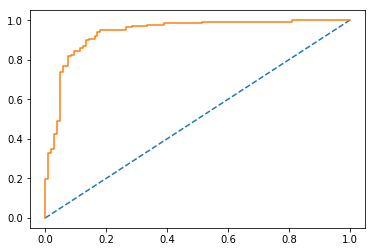

In [42]:
#Plot the ROC curve

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(tpr,fpr)

In [53]:
#ROC AUC
roc_auc_score(y_train, lr_probs[:,1])

0.9377824122349669

In [56]:
#================ Now Checking for Precision and Recall

print("Precision Score: {}" .format( precision_score(y_train, y_train_predLog, average ='binary',pos_label=1))) #pos_label will be label of +ive class

print("Recall Score: {}" .format(recall_score(y_train, y_train_predLog, average = 'binary', pos_label=1)))  #pos_label will be label of +ive class

#if average = none and no pos_label then scores for both classes are returned.
# If the data are multiclass or multilabel, pos_label will be ignored;


Precision Score: 0.8758620689655172
Recall Score: 0.927007299270073


In [57]:
# PR Curve

precisions, recalls, thresholds = precision_recall_curve(y_train,lr_probs[:,1])

#this implementation is restricted to the binary classification task.

In [59]:
precisions.shape

(222,)

In [60]:
recalls.shape

(222,)

In [61]:
thresholds.shape

(221,)

In [63]:
y_train.shape

(242,)

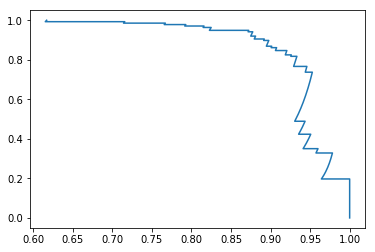

In [64]:
plt.plot(precisions,recalls)

In [75]:
#==== y scores, ROC, PR using decision function ====

In [109]:
y_scores_decfun = logreg_obj.decision_function(X_train)

#Decision function Predicts confidence scores for samples.
# The confidence score for a sample is the signed distance of that sample to the hyperplane.

#Confidence Score is different from threshold probabilities

In [79]:
y_scores_decfun.shape

(242,)

In [110]:
y_scores_decfun

array([-2.69428328,  2.10782553,  5.03780464,  1.38248868,  0.79817796,
       -3.67417568, -2.51383956, -2.34606298,  3.25492103, -5.41924004,
        1.65812806,  5.30211567,  2.96976979,  4.44333953, -4.7884967 ,
        1.24331209,  4.17014961,  1.61903747, -1.30223908,  1.01808357,
        1.14952677, -5.06185588,  4.77509141, -1.33333378,  3.44573554,
       -0.85789138, -4.53126845,  2.85588995,  2.99781568, -2.93525713,
        2.90181106,  3.60832116,  3.21880638,  0.42460207, -1.75066695,
        2.13710767,  3.4746821 ,  0.41807049,  0.07703481,  5.85548471,
       -6.39765897, -4.41356749, -1.30189194, -3.45570992,  3.85878085,
       -1.06031504,  1.94654761,  4.1820807 ,  1.78285713,  0.86576957,
       -2.20160031, -0.20554494,  0.02991947,  1.15245453,  5.89555143,
       -2.19271656,  2.73025874,  0.32620576, -5.17424553, -0.79482753,
        3.32807595, -3.27236788, -0.64923467,  5.63702014, -2.34938071,
        5.35352705, -1.9741834 ,  1.76152239, -3.74757344,  0.33

In [82]:
#====== ROC using decision function ======

fpr_2,tpr_2,threshold_2 = roc_curve(y_train,y_scores_decfun)

In [85]:
print(len(fpr_2))
print(len(threshold_2))

50
50


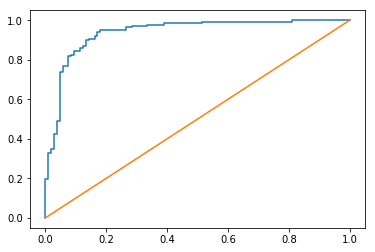

In [97]:
plt.plot(fpr_2,tpr_2)
plt.plot([0,1],[0,1])

In [98]:
#Compare Decision function vs Proba Predict 

In [103]:
roc_auc_score(y_train,y_scores_decfun)           

#We see this AUC score with decsion function is same as AUC using predict_proba

0.9377824122349669

In [120]:
threshold_2

#Notice these are not probabilities. So not actual decision boundary threshold values.
# So wont match with threshold values based of predict_probab

#Also tpr and fpr values wont match.

#But both help with calculating the ROC or the PR curve. Since the roc_curve function or prcurve fn
#accepts etiher the class probability or the confidence score

array([ 6.89555143,  5.89555143,  5.35352705,  5.30211567,  4.12371176,
        4.08041482,  3.27291659,  3.25492103,  3.07072472,  3.04781723,
        2.83132408,  2.73025874,  2.20249543,  2.17265738,  1.16908422,
        1.15245453,  1.07450405,  1.01808357,  0.83652285,  0.82083936,
        0.820518  ,  0.80550064,  0.64997021,  0.42460207,  0.40382541,
        0.34721373,  0.33093642,  0.32620576,  0.23932772,  0.21011886,
        0.20062517,  0.14182372,  0.04123897,  0.03134178, -0.08280941,
       -0.13563854, -0.17423019, -0.69835926, -0.79482753, -0.92385728,
       -0.94024762, -1.18386736, -1.19064413, -1.30441773, -1.33333378,
       -2.19271656, -2.20160031, -4.24718233, -4.41356749, -6.60437197])

In [119]:
threshold

array([1.99725589e+00, 9.97255892e-01, 9.95290848e-01, 9.95043643e-01,
       9.84073430e-01, 9.83380425e-01, 9.63487913e-01, 9.62849541e-01,
       9.55668886e-01, 9.54688196e-01, 9.44345233e-01, 9.38788707e-01,
       9.00473378e-01, 8.97767122e-01, 7.62979444e-01, 7.59958960e-01,
       7.45452517e-01, 7.34599133e-01, 6.97732383e-01, 6.94414484e-01,
       6.94346285e-01, 6.91149889e-01, 6.57003751e-01, 6.04583958e-01,
       5.99606407e-01, 5.85941753e-01, 5.81987205e-01, 5.80835894e-01,
       5.59547971e-01, 5.52337298e-01, 5.49988731e-01, 5.35396620e-01,
       5.10308281e-01, 5.07834803e-01, 4.79309470e-01, 4.66142258e-01,
       4.56552304e-01, 3.32176101e-01, 3.11133045e-01, 2.84172598e-01,
       2.80850328e-01, 2.34357547e-01, 2.33143753e-01, 2.13422460e-01,
       2.08608454e-01, 1.00406454e-01, 9.96068731e-02, 1.41027499e-02,
       1.19669497e-02, 1.35260152e-03])